<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part2/P2_Ch02_CH11_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 11. Implementation 
### MLP를 Numpy로 구현


In [8]:
import numpy as np
from numpy.random import normal
from numpy import zeros

from termcolor import colored
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tensorflow.keras.datasets.mnist import load_data

(train_images, train_labels), test_ds = load_data()
print(type(train_images), type(train_labels))
print(train_images.shape, train_labels.shape)

# view_images = train_images[:9, ...]
# print(view_images.shape)
# fig, axes = plt.subplots(3,3, figsize = (10,10))
# for ax_idx , ax in enumerate(axes.flat):
#   image = view_images[ax_idx]
#   ax.imshow(image)

#Set test env.
n_data = train_images.shape[0]
n_feature = train_images.shape[1]*train_images.shape[2]   #60000개, 28행, 28열에서 28*28로 행열을 곱해서 사용 -> feature 784개
b_size = 128
n_batch = n_data // b_size
epochs = 20 # 전체를 20번 돌림
lr = 0.03
units = [64, 32, 10] # 마지막 뉴런은 숫자를 10개로 구별 할수있게 뉴런도 10개 만듬

#Initialize W, B
W1 = normal(0,1,(n_feature, units[0]))
B1 = zeros(units[0])

W2 = normal(0,1,(units[0], units[1]))
B2 = zeros( units[1])

W3 = normal(0,1,(units[1], units[2]))
B3 = zeros( units[2])

print(colored("W/B shapes", 'green'))
print(colored(f"W1/B1: {W1.shape}/{B1.shape}"))
print(colored(f"W2/B2: {W2.shape}/{B2.shape}"))
print(colored(f"W3/B3: {W3.shape}/{B3.shape}"))








<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
W/B shapes
W1/B1: (784, 64)/(64,)
W2/B2: (64, 32)/(32,)
W3/B3: (32, 10)/(10,)


In [27]:
from prompt_toolkit.shortcuts.progress_bar.formatters import D
losses, accs = list(), list()
for epoch in range(epochs):
  n_correct, n_data = 0,0
  for b_idx in range(n_batch):
    # GET MINI-BATCH
    start_idx = b_idx*b_size
    end_idx = (b_idx + 1)*b_size #start_idx + b_size
    # print(start_idx, end_idx)
    images = train_images[start_idx : end_idx, ...]
    # print(images.shape)
    X = images.reshape(b_size, -1) #flatten이 되면서 뒤에 두개가 곱해짐
    # print(X.shape)
    Y = train_labels[start_idx : end_idx]
    # print(X.shape, Y.shape)
    # print(Y)
    ### forward propagation

    #dense1
    # print(X.shape, W1.shape, B1.shape )
    Z1 = X @ W1 + B1
    # print(Z1.shape)
    A1 = 1/(1 + np.exp(-Z1))
    #dense2
    Z2 = A1 @ W2 + B2
    A2 = 1/(1 + np.exp(-Z2))
    #dense3
    L = A2 @ W3 + B3
    # print(L.shape)

    #Loss
    Pred = np.exp(L)/np.sum(np.exp(L), axis = 1, keepdims = True) # Softmax 연산 , 데이터별로 연산 axis = 1, 
                                                                  # keepdims = True사용해서 sum 이후에도 연산가능한 모양으로 유지)
    # print(Y.shape)
    # print(Pred.shape) 
    # J0 = -np.log(Pred[np.arange(b_size), Y])
    # print(J0) 
    J = np.mean(-np.log(Pred[np.arange(b_size), Y]))
    losses.append(J)

    #Calculate accuracy
    # print(Pred)
    Pred_label = np.argmax(Pred, axis = 1) #최대값 위치반환
    # print(Pred_label.shape, Y.shape)
    n_correct += np.sum(Pred_label ==Y)
    n_data +=b_size
    # print(n_correct, n_data)

    #Backpropagation
    labels = Y.copy()
    Y = np.zeros_like(Pred)
    Y[np.arange(b_size), labels] = 1  #one-hot encoding
    # print(labels)
    # print(Y)

    #Loss
    dL = -1/b_size*(Y-Pred)
    # print(dL.shape)
    #dense3
    dA2 = dL @ W3.T
    dW3 = A2.T @ dL
    dB3 = np.sum(dL, axis = 0) #keepdims 안써야 B3랑 형태 맞아서 안씀
    # print(B3.shape, dB3.shape)
    #dense2
    dZ2 = dA2 * A2 * (1-A2) #activation
    dA1 = dZ2 @ W2.T #affine
    dW2 = A1.T @ dZ2
    dB2 = np.sum(dZ2, axis = 0)
    #dense1
    dZ1 = dA1 * A1 * (1-A1)
    dW1 = X.T @ dZ1
    dB1 = np.sum(dZ1, axis = 0 )

    #parameter update
    W3, B3 = W3 - lr*dW3, B3 - lr*dB3
    W2, B2 = W2 - lr*dW2, B2 - lr*dB2
    W1, B1 = W1 - lr*dW1, B1 - lr*dB1
  accs.append(n_correct/n_data)

<ipython-input-27-8961bdb98a91>:23: RuntimeWarning: overflow encountered in exp
  A1 = 1/(1 + np.exp(-Z1))


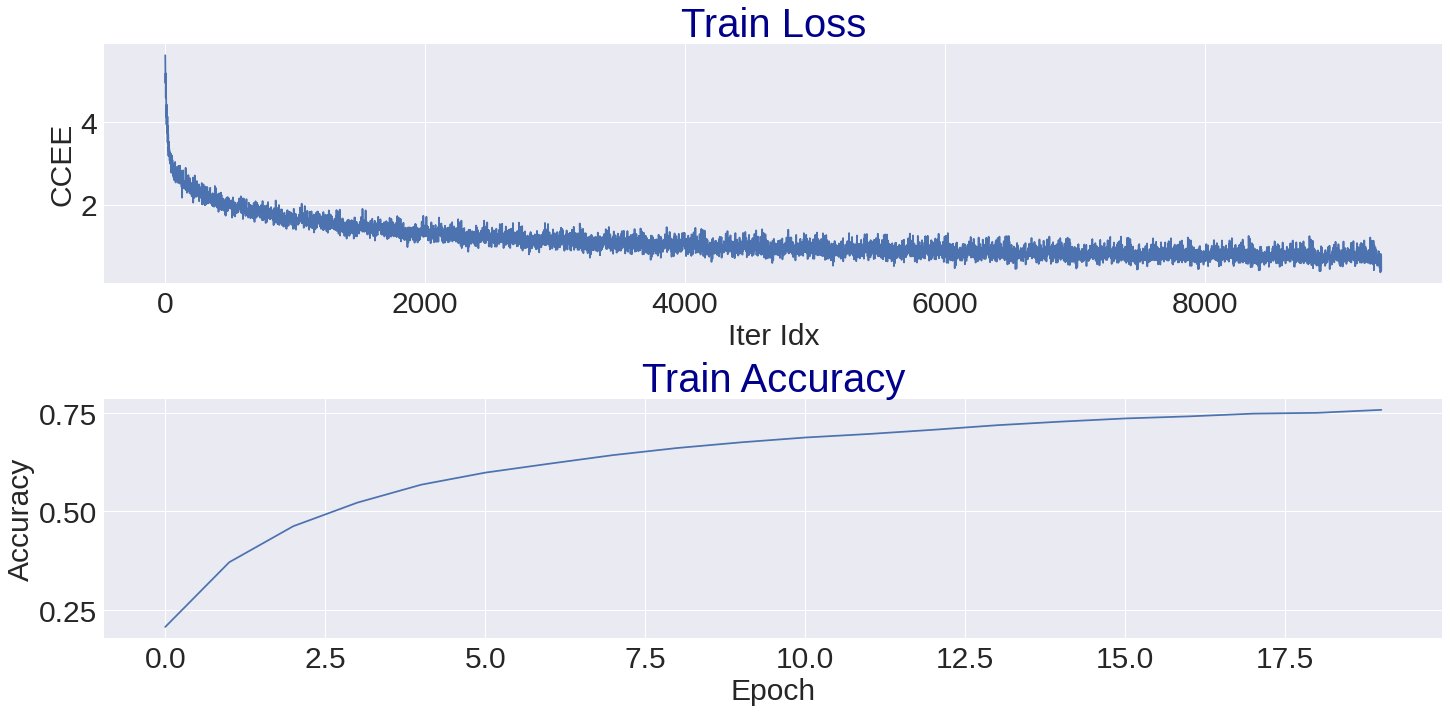

In [30]:
fig, axes = plt.subplots(2,1, figsize = (20,10))
axes[0].plot(losses)
axes[1].plot(accs)

axes[0].set_title('Train Loss', color = 'darkblue', fontsize = 40)
axes[0].set_xlabel('Iter Idx', fontsize = 30)
axes[0].set_ylabel('CCEE', fontsize = 30)

axes[1].set_title('Train Accuracy', color = 'darkblue', fontsize = 40)
axes[1].set_xlabel('Epoch', fontsize = 30)
axes[1].set_ylabel('Accuracy', fontsize = 30)

axes[0].tick_params(labelsize = 30)
axes[1].tick_params(labelsize = 30)

fig.tight_layout()
